# PME3481 - Controle e Aplicações

## Método Gráfico - Root Locus

Lugar das Raízes - Método gráfico para observar a margem de ganho de um sistema dinâmico, especificamente a função de transferência escolhida, e verificar, dessa forma, as condições de estabilidade do sistema.

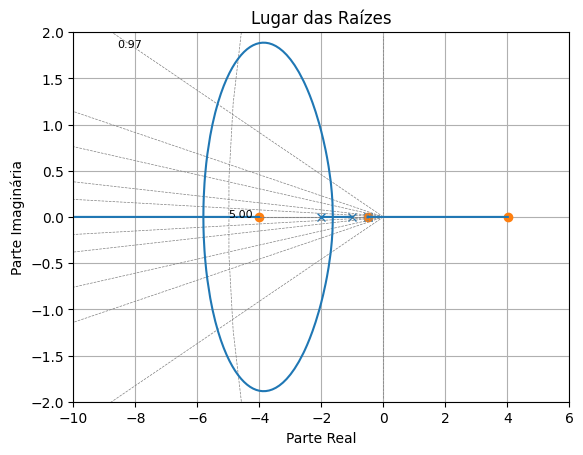

In [4]:
import matplotlib.pyplot as plt
import control as ctrl

# Definindo a função de transferência
num = [9.793, 4.896, -157.7, -78.84]  # Numerador
den = [1, 4, 5.25, 2.75, 0.5]  # Denominador

# Criando a função de transferência
sys = ctrl.TransferFunction(num, den)

# Plotando o root locus
ctrl.rlocus(sys)
plt.title('Lugar das Raízes')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
# Ajustando os limites dos eixos para melhor visualização
plt.xlim([-10, 6])
plt.ylim([-2, 2])
plt.grid(True)
plt.show()